In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

Using TensorFlow backend.


In [2]:
benign_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/benign/datas-final-by-origin-tool.pkl')

In [3]:
malware_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/malware/1/datas-by-origin-tool.pkl')
for i in [2,3,4,5,6,7,8,9,10,11,12,13,42,43,44,45,46,47,48,49,50,52,53,54]:
    pkl_path = '/home/sdsra/Downloads/CTU-13-Dataset/malware/{}/datas-by-origin-tool.pkl'.format(str(i))
    if os.path.exists(pkl_path):
        tmp_data = pd.read_pickle(pkl_path)
        malware_datas = pd.concat([malware_datas, tmp_data], ignore_index=True)

In [4]:
path = '/home/sdsra/Downloads/CTU-13-Dataset/malware-2'
sub_dir_list = os.listdir(path)   
for dir in sub_dir_list:
    pkl_path = path +'/'+dir+'/datas-by-origin-tool.pkl'
    if os.path.exists(pkl_path):
        tmp_data = pd.read_pickle(pkl_path)
        malware_datas = pd.concat([malware_datas, tmp_data], ignore_index=True)

In [6]:
malware_datas['label'].value_counts()

botnet    72008
benign      372
Name: label, dtype: int64

In [7]:
malware_datas = malware_datas[malware_datas['label'] == 'botnet']

In [8]:
len(malware_datas)

72008

In [9]:
numeric_columns = list(filter(lambda x: x not in ['src_ip','src_port','dst_ip','dst_port','proto'], benign_datas.columns))

# Data preprocessing 

In [10]:
X_train, X_test = train_test_split(benign_datas, test_size=0.2, random_state = 101)

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled  = scaler.transform(X_test[numeric_columns])

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
input_layer = Input(shape=(28,))
encoder = Dense(20, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(14, activation='tanh')(encoder)
encoder = Dense(8, activation='tanh')(encoder)
decoder = Dense(14, activation='tanh')(encoder)
decoder = Dense(20, activation='tanh')(decoder)
decoder = Dense(28, activation='tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                580       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                294       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_4 (Dense)              (None, 14)                126       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_6 (Dense)              (None, 28)                588       
Total para

In [13]:
nb_epoch = 100
batch_size = 50
autoencoder.compile(optimizer='adam', loss='mse' )

history = autoencoder.fit(X_train_scaled, X_train_scaled,
                        epochs=nb_epoch,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_split=0.1
                        )

Train on 4879 samples, validate on 543 samples
Epoch 1/100
4879/4879 [==============================] - 8s 2ms/step - loss: 0.0933 - val_loss: 0.0235
Epoch 2/100
4879/4879 [==============================] - 0s 57us/step - loss: 0.0187 - val_loss: 0.0154
Epoch 3/100
4879/4879 [==============================] - 0s 55us/step - loss: 0.0137 - val_loss: 0.0125
Epoch 4/100
4879/4879 [==============================] - 0s 53us/step - loss: 0.0117 - val_loss: 0.0108
Epoch 5/100
4879/4879 [==============================] - 0s 58us/step - loss: 0.0101 - val_loss: 0.0096
Epoch 6/100
4879/4879 [==============================] - 0s 51us/step - loss: 0.0088 - val_loss: 0.0085
Epoch 7/100
4879/4879 [==============================] - 0s 53us/step - loss: 0.0076 - val_loss: 0.0074
Epoch 8/100
4879/4879 [==============================] - 0s 39us/step - loss: 0.0067 - val_loss: 0.0066
Epoch 9/100
4879/4879 [==============================] - 0s 37us/step - loss: 0.0060 - val_loss: 0.0061
Epoch 10/100
4879/

4879/4879 [==============================] - 0s 63us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 79/100
4879/4879 [==============================] - 0s 62us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 80/100
4879/4879 [==============================] - 0s 63us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 81/100
4879/4879 [==============================] - 0s 63us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 82/100
4879/4879 [==============================] - 0s 63us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 83/100
4879/4879 [==============================] - 0s 61us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 84/100
4879/4879 [==============================] - 0s 62us/step - loss: 0.0015 - val_loss: 0.0018
Epoch 85/100
4879/4879 [==============================] - 0s 63us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 86/100
4879/4879 [==============================] - 0s 62us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 87/100
4879/4879 [==============================] - 0s 65us/st

In [14]:
predictions = autoencoder.predict(X_test_scaled)

mse = np.mean(np.power(X_test_scaled - predictions, 2), axis=1)
X_test['mse'] = mse

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
X_test['mse']

3247    0.000591
1673    0.021882
4789    0.000112
1399    0.000519
6058    0.000668
1722    0.000265
4699    0.000109
4586    0.000423
5119    0.000313
1350    0.000872
4807    0.001891
4120    0.000678
4214    0.000399
1054    0.000560
1982    0.001347
6559    0.000618
677     0.000271
3525    0.000310
3679    0.000315
3918    0.001985
133     0.000308
4176    0.000974
5827    0.000790
6746    0.016627
5874    0.000676
5280    0.000158
6303    0.003505
498     0.001852
2715    0.000323
585     0.000152
          ...   
1459    0.030115
4241    0.000108
5988    0.000869
2375    0.000121
1956    0.000391
6662    0.000210
682     0.000438
4427    0.000397
3398    0.000818
1599    0.000385
1935    0.000321
4258    0.000978
6754    0.000212
4800    0.000373
4805    0.000303
5518    0.000052
1307    0.000122
92      0.000402
6562    0.000569
1860    0.000161
3743    0.000413
3845    0.000245
6447    0.000411
966     0.000434
6516    0.002157
5981    0.000411
783     0.000195
1004    0.0054

In [16]:
malware_scaled  = scaler.transform(malware_datas[numeric_columns])

In [17]:
malware_predictions = autoencoder.predict(malware_scaled)

In [18]:
malware_mse = np.mean(np.power(malware_scaled - malware_predictions, 2), axis=1)
malware_datas['mse'] = malware_mse

In [19]:
X_test['is_malware'] = 0

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
malware_datas['is_malware'] = 1

In [21]:
compare_data = pd.concat([X_test, malware_datas], ignore_index=True)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


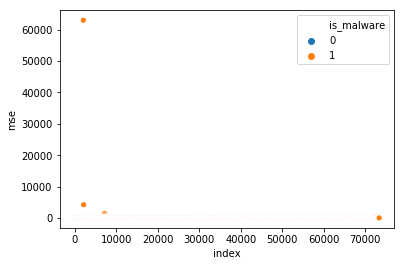

In [22]:
ax = sns.scatterplot(x="index", y="mse", data=compare_data.reset_index(), hue='is_malware')

In [23]:
border_mse = 0.06

In [24]:
compare_data[compare_data['is_malware'] == 1]

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,dst_ip,dst_port,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_malware,is_valid_cert,label,mse,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,src_ip,src_port,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp
1356,1,365.0,8.679093,2048.0,667.106526,65.55.196.251,tcp,0,1627,1,-1,1,0,botnet,0.065758,2.076923,2.00,26,3132,1.0,0.230769,0.000000,0.216347,0.000000,72.028298,0.0,1.000000,1.000000,147.32.84.165,443,3.446061,0.0,1533.317331,45904,3306387
1357,1,365.0,8.456332,2048.0,1256.207871,65.55.16.187,tcp,0,768,1,-1,1,0,botnet,0.068996,2.153846,2.00,13,1502,1.0,0.307692,0.000000,0.216265,0.000000,64.997118,0.0,1.000000,1.000000,147.32.84.165,443,3.865786,0.0,1987.078268,24292,1578910
1358,1,365.0,1.904638,1024.0,-1.000000,65.54.234.75,tcp,0,31,-1,-1,1,0,botnet,0.058528,2.000000,-1.00,2,78,1.0,0.000000,0.000000,0.437548,0.000000,21.536630,0.0,1.000000,1.000000,147.32.84.165,443,0.014335,0.0,-1.000000,2184,47036
1359,1,730.0,1.283656,1024.0,-1.000000,74.125.224.242,tcp,0,9,-1,-1,1,0,botnet,0.058175,2.000000,-1.00,1,18,1.0,0.000000,0.000000,0.820889,0.000000,2.859956,0.0,1.000000,1.000000,147.32.84.165,443,0.000000,0.0,-1.000000,914,2614
1360,1,730.0,1.242682,1024.0,-1.000000,74.125.224.240,tcp,0,12,-1,-1,1,0,botnet,0.058168,2.000000,-1.00,1,22,1.0,0.000000,0.000000,0.820890,0.000000,6.939796,0.0,1.000000,1.000000,147.32.84.165,443,0.000000,0.0,-1.000000,980,6801
1361,1,730.0,1.302272,1024.0,-1.000000,74.125.224.243,tcp,0,9,-1,-1,1,0,botnet,0.058176,2.000000,-1.00,1,18,1.0,0.000000,0.000000,0.820892,0.000000,2.636653,0.0,1.000000,1.000000,147.32.84.165,443,0.000000,0.0,-1.000000,944,2489
1362,1,365.0,2.199899,2048.0,-1.000000,65.54.186.47,tcp,0,11,-1,-1,1,0,botnet,0.061098,3.000000,-1.00,1,34,1.0,0.000000,0.000000,0.844684,0.000000,21.754555,0.0,1.000000,1.000000,147.32.84.165,443,0.000000,0.0,-1.000000,933,20297
1363,1,365.0,1.639505,2048.0,228.678268,65.54.165.169,tcp,0,38,-1,-1,1,0,botnet,0.065138,3.000000,-1.00,4,122,1.0,0.500000,0.000000,0.844761,0.000000,10.777757,0.0,1.000000,1.000000,147.32.84.165,443,0.133283,0.0,12.868672,5395,58146
1364,0,-1.0,0.874874,-1.0,1051.650287,206.222.227.2,tcp,0,42,-1,-1,1,-1,botnet,0.002309,-1.000000,-1.00,4,90,1.0,0.500000,1.000000,-1.000000,0.000000,3.429269,0.0,1.000000,0.000000,147.32.84.165,443,0.311068,-1.0,5.107539,5938,20363
1365,1,730.0,0.697734,1024.0,-1.000000,205.188.101.160,tcp,0,12,-1,-1,1,0,botnet,0.018633,2.000000,-1.00,1,20,1.0,0.000000,1.000000,0.517194,0.000000,3.032727,0.0,1.000000,1.000000,147.32.84.165,443,0.000000,0.0,-1.000000,1100,3336


In [25]:
 = compare_data.apply(lambda x: 1 if x['mse'] > border_mse else 0, axis=1)

SyntaxError: invalid syntax (<ipython-input-25-e848b490150a>, line 1)

In [26]:
data_real = compare_data['is_malware']

In [27]:
data_predict = compare_data.apply(lambda x: 1 if x['mse'] > border_mse else 0, axis=1)

In [28]:
confusion_matrix(data_real, data_predict)

array([[ 1355,     1],
       [66039,  5969]])

In [62]:
TN = 1356
FP = 0
FN = 91
TP = 508

In [63]:
accuracy = (TN + TP) / (TN + TP + FP + FN)

In [64]:
precision = TP / (TP + FN)

In [65]:
print('accuracy : {}, precision: {}'.format(accuracy, precision))

accuracy : 0.9534526854219949, precision: 0.8480801335559266
